# Color Image Augmentation Methods

## 1. Import required libraries

In [3]:
import albumentations as A  
import cv2 
import matplotlib.pyplot as plt

## 2. Define visualization function

In [4]:
def visualize(image1 , image2):
    plt.figure(figsize=(20,20))
    plt.axis('off')
    plt.subplot(1,2,1)
    plt.title('Original Image')
    plt.imshow(image1)
    plt.subplot(1,2,2)
    plt.title('Augmented Image')
    plt.imshow(image2)
    

## 3. define augmentation pipeline

In [247]:
transform = A.Compose([
    A.RandomBrightnessContrast(p=0.7),
    A.HueSaturationValue(hue_shift_limit=50),
    A.RGBShift(r_shift_limit=[50,100]),
    A.InvertImg(p=0.8),
    # A.RandomGamma(100),
    A.ChannelShuffle(p=0.8),
    # A.ToGray(),
])

## 4. read images from the disk

In [265]:
image1 = cv2.imread("images/colour2.jpg")
image2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # converting BGR to RGB explicitly 
image1.shape

(2667, 4000, 3)

In [230]:
print(image1[0])

[[134 178 155]
 [133 177 154]
 [132 176 153]
 ...
 [  1 174 254]
 [  2 172 254]
 [  1 171 253]]


In [231]:
image2[0]

array([[155, 178, 134],
       [154, 177, 133],
       [153, 176, 132],
       ...,
       [254, 174,   1],
       [254, 172,   2],
       [253, 171,   1]], dtype=uint8)

## 5. pass images to the augmentation pipeline

dict_keys(['image']) <class 'numpy.ndarray'>


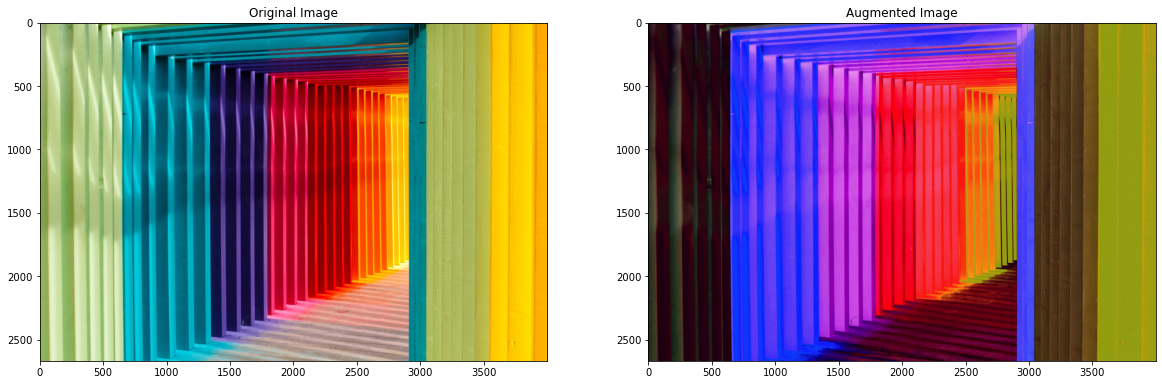

In [252]:
transformed = transform(image=image2) # returns a dictionary with key image and value as augmented image array

print(transformed.keys(), type(transformed['image']))
visualize(image2, transformed['image'])

# Some color augmentations

In [119]:
transform = (
    # Randomly changes brightness and contrast of the input image
    A.RandomBrightnessContrast(p=1, brightness_limit=0.8, contrast_limit=0.2)  
)

In [253]:
transform = (
    # Randomly changes hue, saturation and value of the input image 
    A.HueSaturationValue(hue_shift_limit=30, sat_shift_limit=50, val_shift_limit=30, p = 0.8) 
    )

image_loc = 'images/hsv.png'
image1 = cv2.imread(image_loc)
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

In [166]:
transform = (
    # Randomly shift values for each channel of the input RGB image.
    A.RGBShift(b_shift_limit=[50,100], p = 1)
    )

In [167]:
transform = (
    # Invert the input image by subtracting pixel values from 255
    A.InvertImg(p=0.8)
    # A.RandomGamma(100)
    # A.ChannelShuffle(p=0.8)
    # A.ToGray()
    )

In [216]:
transform = (
    A.OneOf([
        A.RandomGamma(gamma_limit=(80, 120), p=0.6),
        A.ChannelShuffle(p=0.8) # Randomly rearrange channels of the input RGB image
    ])
)

In [200]:
transform = (
    # to grayscale
    A.ToGray(p=1)
)

In [261]:
image_loc = 'images/bird.jpg'
image1 = cv2.imread(image_loc)
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

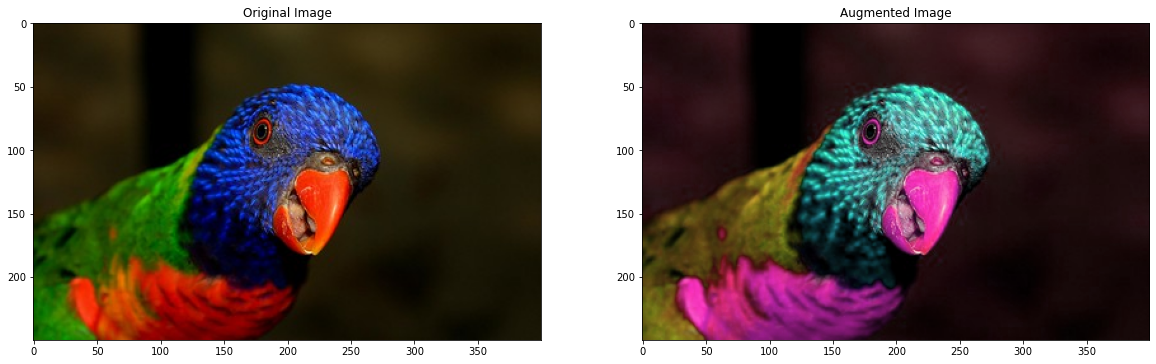

In [264]:
transformed = transform(image = image1)
visualize(image1, transformed['image'])